In [1]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import OCOSIM
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
from scipy.ndimage import uniform_filter
from  scipy.optimize import curve_fit
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
import os, pickle 
from matplotlib import font_manager
from oco_satellite import satellite_download
import matplotlib.image as mpl_img

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [2]:
cfg_name='20181018_central_asia_2_470cloud_test2.csv'

cfg_dir = '../simulation/cfg'


cfg_info = grab_cfg(f'{cfg_dir}/{cfg_name}')
if 'o2' in cfg_info.keys():
    id_num = output_h5_info(f'{cfg_dir}/{cfg_name}', 'o2')[-12:-3]
    boundary = [[float(i) for i in cfg_info['subdomain']], 'r']
else:
    boundary = [[float(i) for i in cfg_info['subdomain']], 'orange']
subdomain = cfg_info['subdomain']

In [140]:


with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_o2a.pkl', 'rb') as f:
    o1 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_wco2.pkl', 'rb') as f:
    o2 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_sco2.pkl', 'rb') as f:
    o3 = pickle.load(f)


cld_data = pd.read_pickle(f'{cfg_name[:-4]}_cld_distance.pkl')
cld_dist = cld_data['cld_dis']

In [148]:
with open(f'20181018_central_asia_2_470cloud_test2_o2a.pkl', 'rb') as f:
    o1 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test2_wco2.pkl', 'rb') as f:
    o2 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test2_sco2.pkl', 'rb') as f:
    o3 = pickle.load(f)


cld_data = pd.read_pickle(f'{cfg_name[:-4]}_cld_distance.pkl')
cld_dist = cld_data['cld_dis']

In [149]:
o3.rad_c3d_5.shape

(242, 302, 11)

In [150]:
cld_data.shape

(73084, 3)

In [156]:
self = o3
z = 150
fp = 150
#print(f'cloud distance: {cld_dist[z, fp]} km')
self.rad_c3d_5[z,fp,-1]

0.0009575313621976529

In [152]:
o1.toa

array([1.11216727, 1.28106896, 1.27850373, 1.27329085, 1.27291907,
       1.27732147, 1.27486497, 1.26424937, 1.26083873, 1.24301563,
       1.15375212])

In [153]:
o3.toa

array([0.11095671, 0.11095671, 0.11095671, 0.11095671, 0.11095671,
       0.11095671, 0.11095671, 0.11095671, 0.11095671, 0.11095671,
       0.11095671])

In [154]:
self.rad_c3d[z,fp,:]/self.toa*np.pi

array([0.1052069 , 0.08375211, 0.07519604, 0.03832092, 0.05565261,
       0.04511687, 0.03228202, 0.12033399, 0.06231922, 0.09257784,
       0.13378394])

In [155]:
self.rad_c3d_5[z,fp,:]/self.toa*np.pi

array([0.10516343, 0.08399855, 0.07531246, 0.03750891, 0.05531777,
       0.04473491, 0.03253944, 0.11961385, 0.06292602, 0.09140964,
       0.13283463])

In [114]:
title_size = 16
label_size = 14
legend_size = 14
tick_size = 12

0


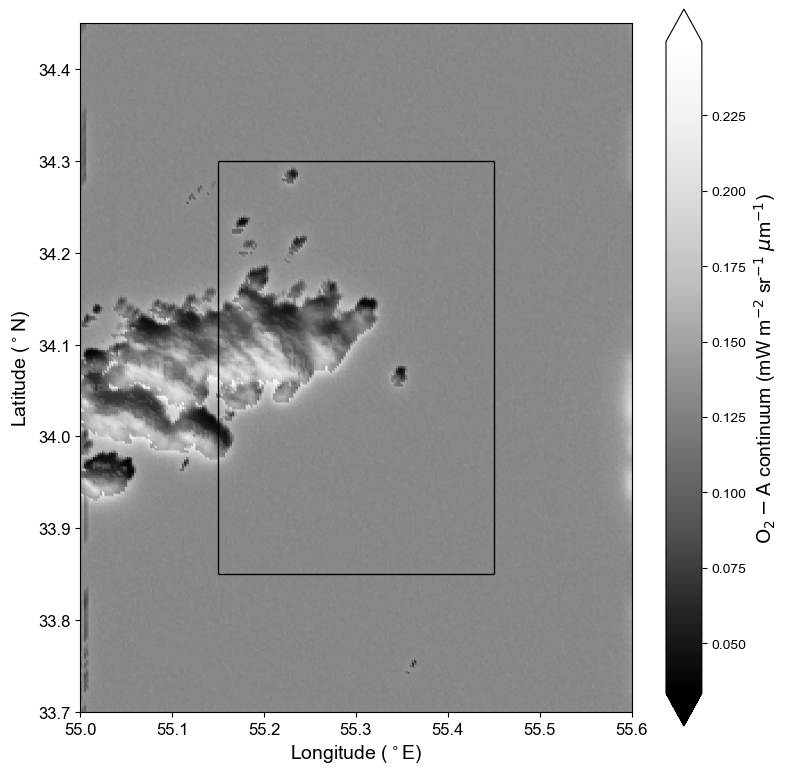

In [115]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o1.lon2d, o1.lat2d, 
               c=getattr(o1, 'rad_c3d')[:,:,-1], s=5,
               cmap='Greys_r')
ax.scatter(o1.lon2d[mask], o1.lat2d[mask], 
               c='b', s=10,
               cmap='Reds')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{O_2-A}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

0


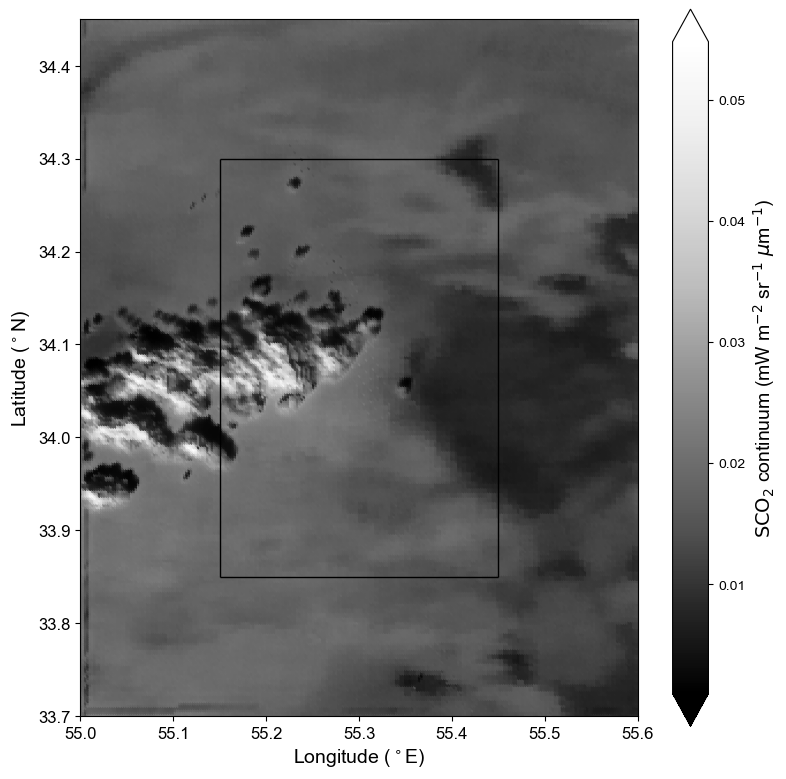

In [163]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o3, 'rad_c3d')[:,:,1])
print(mask.sum())
c = ax.scatter(o3.lon2d, o3.lat2d, 
               c=getattr(o3, 'rad_c3d')[:,:,1]/o3.toa[1], s=5,
               cmap='Greys_r')
ax.scatter(o3.lon2d[mask], o3.lat2d[mask], 
               c='b', s=10,
               cmap='Greys_r')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{SCO_2}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

0


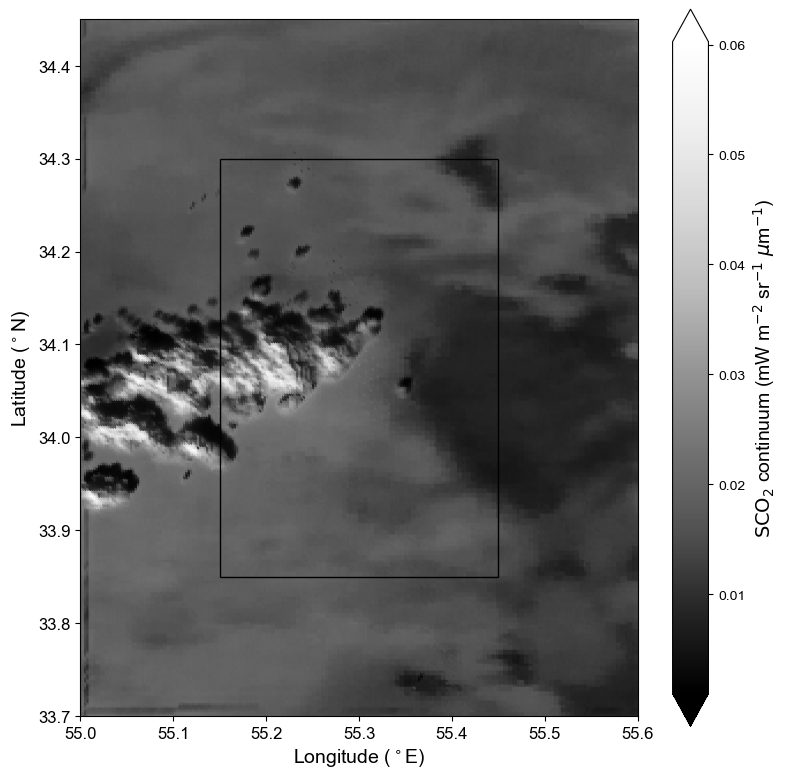

In [164]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o3, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o3.lon2d, o3.lat2d, 
               c=getattr(o3, 'rad_c3d')[:,:,-1]/o3.toa[-1], s=5,
               cmap='Greys_r')
ax.scatter(o3.lon2d[mask], o3.lat2d[mask], 
               c='b', s=10,
               cmap='Greys_r')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{SCO_2}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

In [159]:
self = o3
z = 150
fp = 150
#print(f'cloud distance: {cld_dist[z, fp]} km')
self.rad_c3d_5[z,fp,-1]

0.0009575313621976529

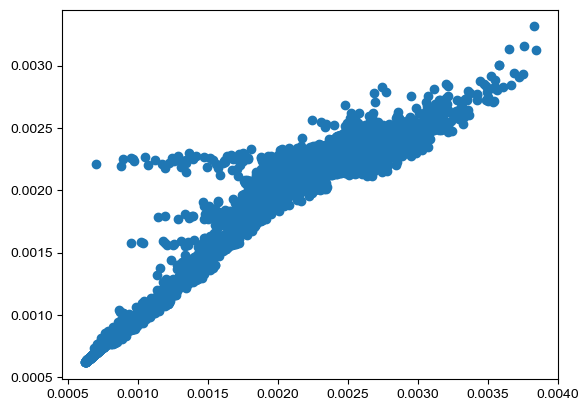

In [160]:
plt.scatter(self.rad_c3d_5[:,:,-1], self.rad_c1d_5[:,:,-1])
plt.show()

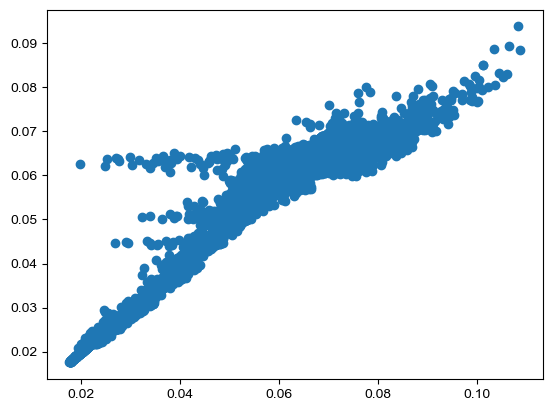

In [162]:
plt.scatter(self.rad_c3d_5[:,:,-1]/self.toa[-1]*np.pi, self.rad_c1d_5[:,:,-1]/self.toa[-1]*np.pi)
plt.show()

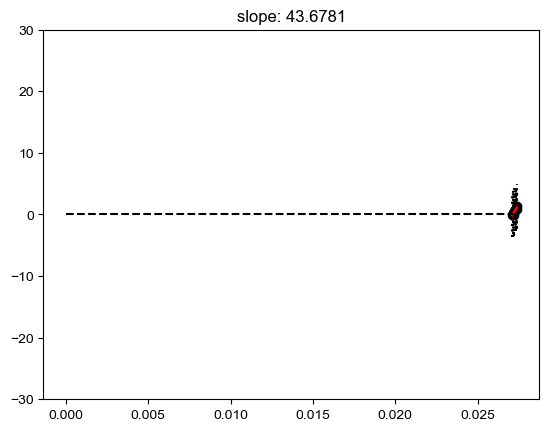

In [161]:


f,frame=plt.subplots()
frame.plot(self.rad_c3d_5[z,fp,:]/self.toa*np.pi,self.sl_5[z,fp,:]*100,'ko') 
for l,wl in enumerate(self.lam):
    frame.plot([self.rad_c3d_5[z,fp,l]/self.toa[l]*np.pi,self.rad_c3d_5[z,fp,l]/self.toa[l]*np.pi],
             np.array([self.sl_5[z,fp,l]-self.sls_5[z,fp,l],self.sl_5[z,fp,l]+self.sls_5[z,fp,l]])*100,'k:')        
slope, slopes = self.slope_5avg[z,fp,:]
intercept,intercepts = self.inter_5avg[z,fp,:]
mn = np.min(self.rad_c3d_5[z,fp,:]/self.toa[:]*np.pi)
mx = np.max(self.rad_c3d_5[z,fp,:]/self.toa[:]*np.pi)
xx=np.linspace(mn,mx,10)
yy=intercept+slope*xx
y1=intercept+intercepts+(slope+slopes)*xx
y2=intercept-intercepts+(slope-slopes)*xx
frame.plot(xx,yy*100,'r-',linewidth=2)  
frame.plot(xx,y1*100,'r:',linewidth=1)  
frame.plot(xx,y2*100,'r:',linewidth=1)  
frame.plot([0,mx],[0,0],'k--')
# ywc added
frame.set_title('slope: {:.4f}'.format(slope))
frame.set_ylim(-30, 30)

plt.show()

IndexError: index 150 is out of bounds for axis 0 with size 39

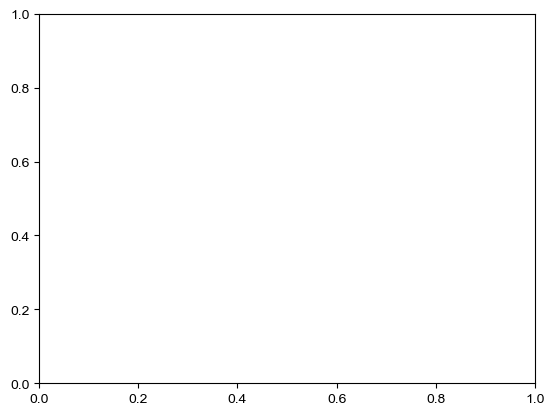

In [84]:


f,frame=plt.subplots()
frame.plot(self.rad_c3d[z,fp,:]/self.toa*np.pi,self.sl[z,fp,:]*100,'ko') 
for l,wl in enumerate(self.lam):
    frame.plot([self.rad_c3d[z,fp,l]/self.toa[l]*np.pi,self.rad_c3d[z,fp,l]/self.toa[l]*np.pi],
             np.array([self.sl[z,fp,l]-self.sls[z,fp,l],self.sl[z,fp,l]+self.sls[z,fp,l]])*100,'k:')        
slope, slopes = self.slopeavg[z,fp,:]
intercept,intercepts = self.interavg[z,fp,:]
mn = np.min(self.rad_c3d[z,fp,:]/self.toa[:]*np.pi)
mx = np.max(self.rad_c3d[z,fp,:]/self.toa[:]*np.pi)
xx=np.linspace(mn,mx,10)
yy=intercept+slope*xx
y1=intercept+intercepts+(slope+slopes)*xx
y2=intercept-intercepts+(slope-slopes)*xx
frame.plot(xx,yy*100,'r-',linewidth=2)  
frame.plot(xx,y1*100,'r:',linewidth=1)  
frame.plot(xx,y2*100,'r:',linewidth=1)  
frame.plot([0,mx],[0,0],'k--')
# ywc added
frame.set_title('slope: {:.4f}'.format(slope))
frame.set_ylim(-30, 30)

plt.show()